In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

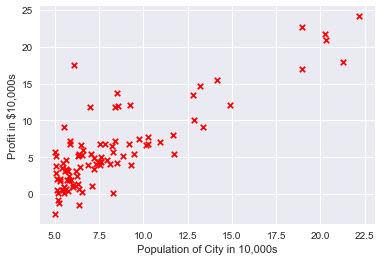

In [2]:
ex1data1 = 'ex1data1.txt'
data1 = pd.read_csv(ex1data1, header = None, names = ['Population', 'Profit'])
data1['ones'] = pd.Series(np.ones(97))
data1 = data1[['ones', 'Population', 'Profit']]
X = np.matrix(data1.iloc[:, 0 : 2])
y = np.matrix(data1.iloc[:, 2]).T
dataPlot = plt.scatter(data1['Population'], data1['Profit'],s=30, c='r', marker = 'x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
dataPlot

In [3]:
def computeCost(X, y, theta):
    m = y.size
    J = 0
    theta = np.matrix(theta).T
    h = X.dot(theta)
    J = 1 / (2 * m) * np.sum(np.square(h - y))
    
    return(J)

computeCost(X, y, [0, 0])

32.072733877455676

In [4]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    cost = np.zeros(num_iters)
    theta = np.matrix(theta).T
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * (1 / m) * (X.T.dot(h - y))
        cost[iter] = computeCost(X, y, theta.T)
    
    return(theta, cost)

gradientDescent(X, y, theta=[0, 0], alpha=0.01, num_iters=1500)

(matrix([[-3.63029144],
         [ 1.16636235]]),
 array([ 6.73719046,  5.93159357,  5.90115471, ...,  4.48343473,
         4.48341145,  4.48338826]))

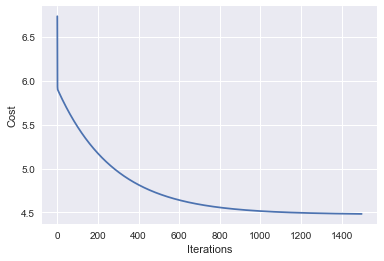

In [5]:
theta, cost = gradientDescent(X, y, theta=[0, 0], alpha=0.01, num_iters=1500)
plt.plot(cost)
plt.ylabel('Cost')
plt.xlabel('Iterations')

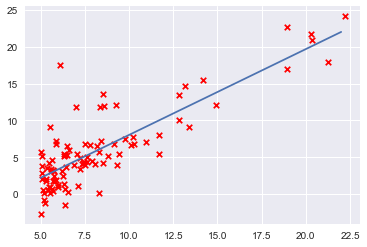

In [6]:
xx = np.arange(5, 23).reshape(18, 1)
yy = float(theta[0]) + float(theta[1]) * xx

plt.scatter([X[:, 1]], y,s=30, c='r', marker = 'x')
plt.plot(xx, yy, label='Linear regression (Gradient descent)');

In [7]:
predict1 = theta.T.dot(np.matrix([1, 3.5]).T)
predict2 = theta.T.dot(np.matrix([1, 7]).T)
print(predict1 * 10000)
print(predict2 * 10000)

[[ 4519.7678677]]
[[ 45342.45012945]]


In [8]:
ex1data2 = 'ex1data2.txt'
data2 = pd.read_csv(ex1data2, header = None, names = ['Housesize', 'Bedrooms', 'Price'])
data2 = (data2 - data2.mean()) / data2.std()
data2['ones'] = pd.Series(np.ones((47), dtype = np.int))
data2 = data2[['ones', 'Housesize', 'Bedrooms', 'Price']]
X = np.matrix(data2.iloc[:, 0 : 3])
y = np.matrix(data2.iloc[:, 3]).T
X.shape

(47, 3)

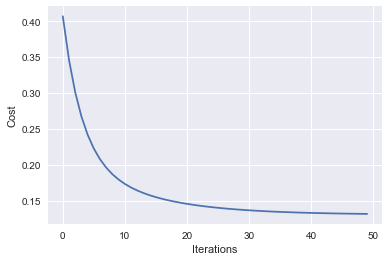

In [9]:
theta1, cost1 = gradientDescent(X, y, theta=[0, 0, 0], alpha=0.1, num_iters=50)
theta2, cost2 = gradientDescent(X, y, theta=[0, 0, 0], alpha=0.01, num_iters=50)
theta3, cost3 = gradientDescent(X, y, theta=[0, 0, 0], alpha=0.001, num_iters=50)
plt.plot(cost1)
plt.ylabel('Cost')
plt.xlabel('Iterations')

In [10]:
def normalEquation(X, y):
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T.dot(y))
    return theta

In [11]:
theta = normalEquation(X, y)
print(theta)
predict = theta.T.dot(np.matrix([1, 1650, 3]).T)

[[  2.85358078e-17]
 [  8.84765988e-01]
 [ -5.31788197e-02]]
